## Problem Definition : Predict the total ride duration of taxi trips in New York City.

## Hypothesis Generated:
Trip duration  will be affected by following -
1. Pickup datetime of trips
2. Pickup and Drop location
3. Number of passengers
4. Traffic condition
5. Weather Condition
6. Mechanical issue

## Data Loading After Extraction:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings(action = 'ignore')
import datetime as dt

In [2]:
data = pd.read_csv('nyc_taxi_trip_duration.csv')

## Variable Identification and Typecasting:

In [3]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

Here we have only numerical data type that needs to be analysed and we will convert the pickup_datetime and dropoff_datetime to datetime module.

In [4]:
# converting strings to datetime features

data['pickup_datetime'] = pd.to_datetime(data.pickup_datetime)
data['dropoff_datetime'] = pd.to_datetime(data.dropoff_datetime)

In [5]:
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

There are no missing values, then we don't need to drop NaN values.

### Target Variable:
Let us analyse our target variable trip_duration.

In [6]:
# Trip duration in hours

data['trip_duration'].mean()/3600

0.2645080925998545

In [7]:
data['trip_duration'].std()/3600

1.0735072770225538

In [8]:
data['trip_duration'].min()/3600

0.0002777777777777778

In [9]:
data['trip_duration'].max()/3600

538.8155555555555

In [10]:
data['trip_duration'].median()/3600

0.18416666666666667

Or we can use .describe() function

In [11]:
data['trip_duration'].describe()/3600

count    202.589444
mean       0.264508
std        1.073507
min        0.000278
25%        0.110278
50%        0.184167
75%        0.298611
max      538.815556
Name: trip_duration, dtype: float64

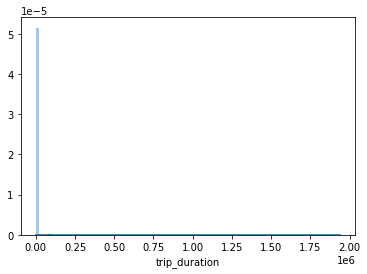

In [12]:
sns.distplot(data['trip_duration'], bins = 100)
plt.show()

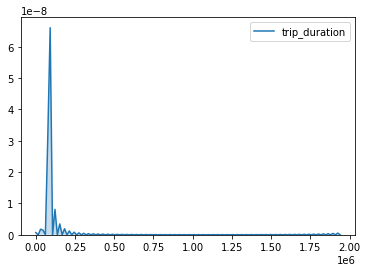

In [13]:
sns.kdeplot(data['trip_duration'], shade = True)
plt.show()

Since there is a huge outlier, we will take log of the trip_duration for visualising it better.

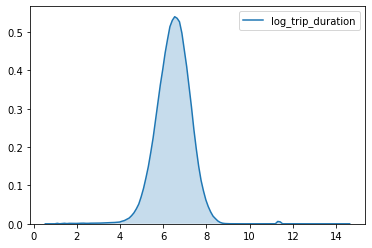

In [14]:
data['log_trip_duration'] = np.log(data['trip_duration'].values + 1)
sns.kdeplot(data['log_trip_duration'], shade = True)
plt.show()

1. The trip duration of rides are forming almost normal curve.
2. As noticed earlier, there is an outlier present near 12.
3. Also there are very short rides present which are of less than 10 seconds, which are suspicious.

# Univariate Analysis:
We will check our hypothesis using univariate analysis of variables.

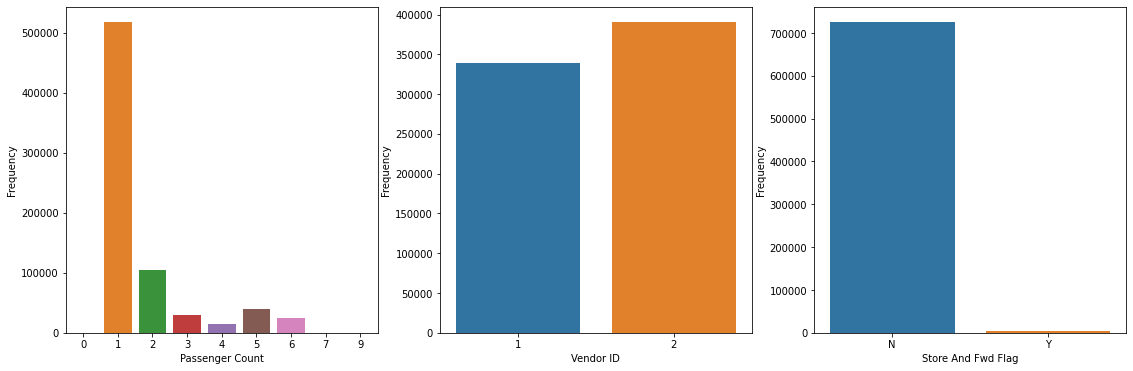

In [15]:
plt.figure(figsize=(19, 6))

plt.subplot(1, 3, 1)
sns.countplot(data['passenger_count'])
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.countplot(data['vendor_id'])
plt.xlabel('Vendor ID')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.countplot(data['store_and_fwd_flag'])
plt.xlabel('Store And Fwd Flag')
plt.ylabel('Frequency')
plt.show()

Observation - 
1. Most frequent rides include only 1 passenger, while some of the rides include 7 to 9 passengers too and they are very low in number.
2. Most of the rides have been completed by vendor 2 as compared to vendor 1.
3. There is almost no storing of data taking place in the taxi and being updated later. (Y - Yes, N - No)

##### Observing trend in pickup datetime of trips

In [16]:
data['day_of_week'] = data['pickup_datetime'].dt.weekday
data['hour_of_day'] = data['pickup_datetime'].dt.hour

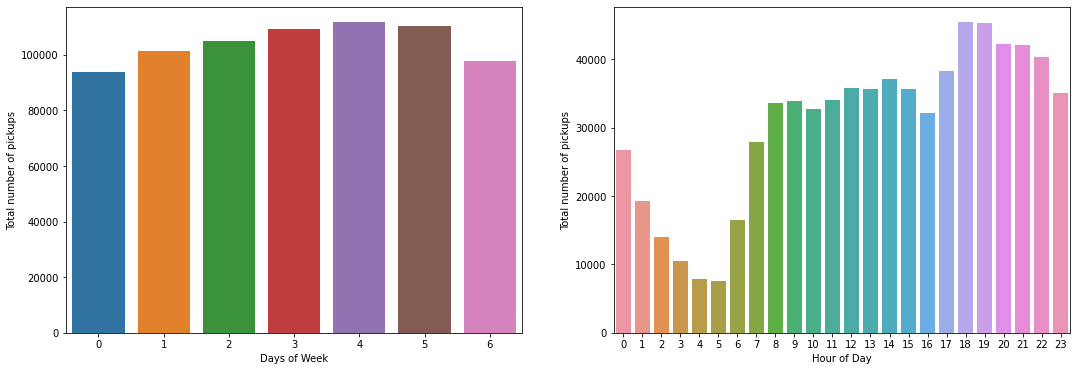

In [17]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.countplot(data['day_of_week'])
plt.xlabel('Days of Week')
plt.ylabel('Total number of pickups')

plt.subplot(1, 2, 2)
sns.countplot(data['hour_of_day'])
plt.xlabel('Hour of Day')
plt.ylabel('Total number of pickups')
plt.show()

Observation -
1. Observing the above trend, we can see that the most of the rides are on Thursday, while on the weekends, there is lowest number of rides (0 is Sunday).
2. Total number of rides in 24 hours are mostly around 18-19 hours, i.e. evening. While in the morning peak hour, it is lower than expected.

##### Observing location of pickup and dropoff

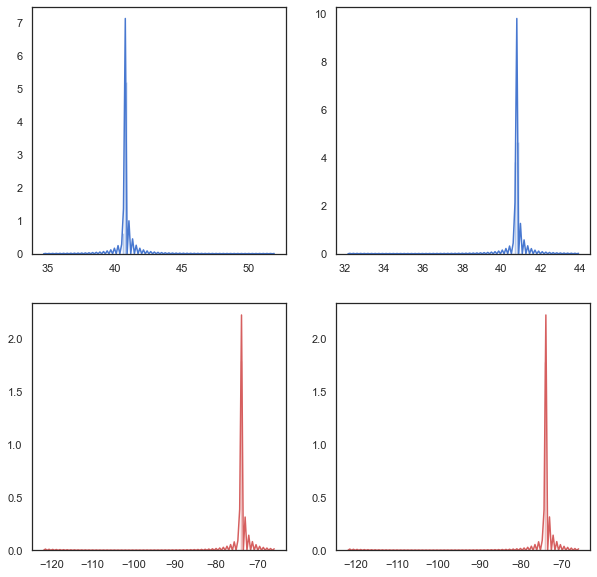

In [18]:
sns.set(style="white", palette="muted")
f, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(10, 10), sharex = False, sharey = False)
sns.distplot(data['pickup_latitude'].values, label = 'pickup_latitude', color="b", bins = 100, ax=axes[0,0])
sns.distplot(data['pickup_longitude'].values, label = 'pickup_longitude', color="r", bins =100, ax=axes[1,0])
sns.distplot(data['dropoff_latitude'].values, label = 'dropoff_latitude', color="b", bins =100, ax=axes[0,1])
sns.distplot(data['dropoff_longitude'].values, label = 'dropoff_longitude', color="r", bins =100, ax=axes[1,1])
plt.show()

* Latitude - Blue
* Longitude - Red

Observation -
1. Pickup and drop latitudes are denser around 40 to 41, and longitude are denser around -74 to -73.
2. Extreme values are present in the data which depicts higher value of distance.

We will remove these outliers or extreme values and observe the data closely.

In [19]:
# Removal of outliers.

data = data.loc[(data.pickup_latitude > 40.6) & (data.pickup_latitude < 40.9)]
data = data.loc[(data.dropoff_latitude>40.6) & (data.dropoff_latitude < 40.9)]
data = data.loc[(data.dropoff_longitude > -74.05) & (data.dropoff_longitude < -73.7)]
data = data.loc[(data.pickup_longitude > -74.05) & (data.pickup_longitude < -73.7)]
data_new = data.copy()

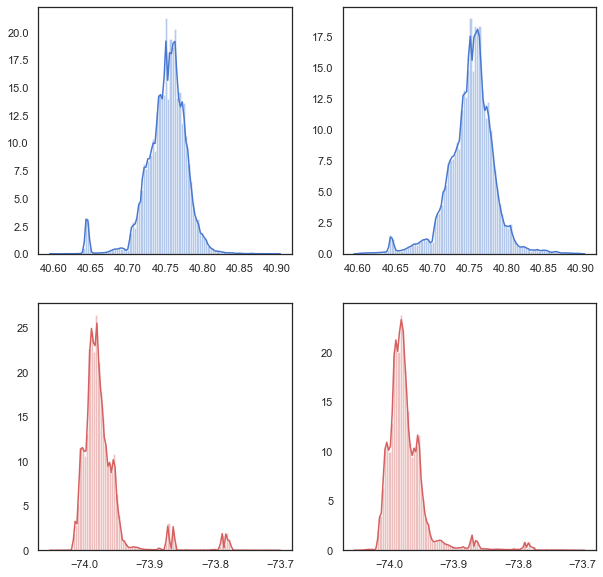

In [20]:
sns.set(style="white", palette="muted")
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)
sns.distplot(data_new['pickup_latitude'].values, label = 'pickup_latitude',color="b",bins = 100, ax=axes[0,0])
sns.distplot(data_new['pickup_longitude'].values, label = 'pickup_longitude',color="r",bins =100, ax=axes[1,0])
sns.distplot(data_new['dropoff_latitude'].values, label = 'dropoff_latitude',color="b",bins =100, ax=axes[0, 1])
sns.distplot(data_new['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins =100, ax=axes[1, 1])
plt.show()

Observation -
* Most of the rides are located between these locations, apart from few outliers outside the above range.

# Bivariate Analysis:
We will compare each of the variables with the target variable, 'trip_duration', in order to derive the relation between them.

In [21]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'log_trip_duration', 'day_of_week', 'hour_of_day'],
      dtype='object')

In [22]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,day_of_week,hour_of_day
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,5.993961,0,16
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,7.003974,4,23
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,7.400010,6,17
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,7.040536,1,9
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,6.744059,2,6


## Trip duration and Weekdays
##### Do the trips on weekdays have higher trip duration?

* We will use Time series plot, 'tsplot', to plot between datetime and a continuous variable.
* For plotting each day, we will take central tendency, i.e. median of each day's trip_duration and plot it against the days of week.

In [23]:
average_duration_day = pd.DataFrame(data.groupby(['day_of_week'])['trip_duration'].median())
average_duration_day.reset_index(inplace = True)
average_duration_day['unit']=1

In [24]:
average_duration_day

,day_of_week,trip_duration,unit
0,0,629.0,1
1,1,676.0,1
2,2,695.0,1
3,3,706.0,1
4,4,688.0,1
5,5,634.0,1
6,6,599.0,1


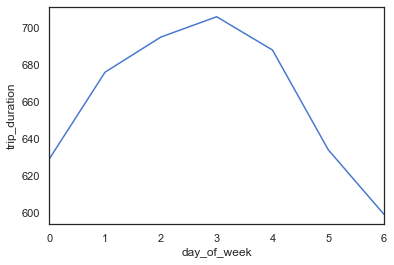

In [25]:
sns.tsplot(data=average_duration_day, time="day_of_week", unit = 'unit', value="trip_duration");

Observation -
1. Longest trip duration has been observed on Wednesday.
2. Opposite to expectation, trip duration on weekends are lowest.

In [26]:
average_duration_hour = pd.DataFrame(data.groupby(['hour_of_day'])['trip_duration'].median())
average_duration_hour.reset_index(inplace = True)
average_duration_hour['unit']=1

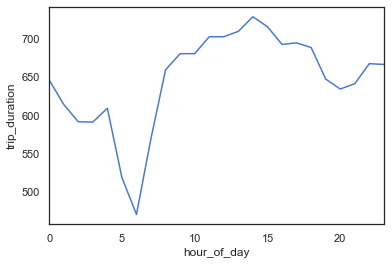

In [27]:
sns.tsplot(data=average_duration_hour, time='hour_of_day', unit = 'unit', value='trip_duration')
plt.show()

Observation -
* Trip duration during early morning are comparatively lesser which may be because of low traffic, and highest during evening peak hour.
* There is a correlation between the number of pickups and trip duration as it follows the similar trend.

## Trip Duration and Vendor ID
##### Do the vendors have any impact on the trip duration?
We will check the duration of trip for each vendor.

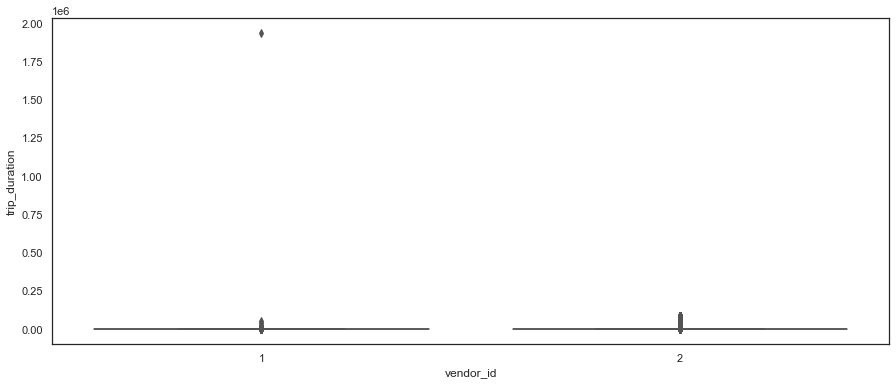

In [28]:
plt.figure(figsize=(15, 6))
sns.boxplot(x = 'vendor_id', y = 'trip_duration', data = data)
plt.show()

Observation -
* As we can see, there is a huge outlier/extreme point for vendor 1 as compared to vendor 2.

* Let's remove the outliers and observe the above data closely.

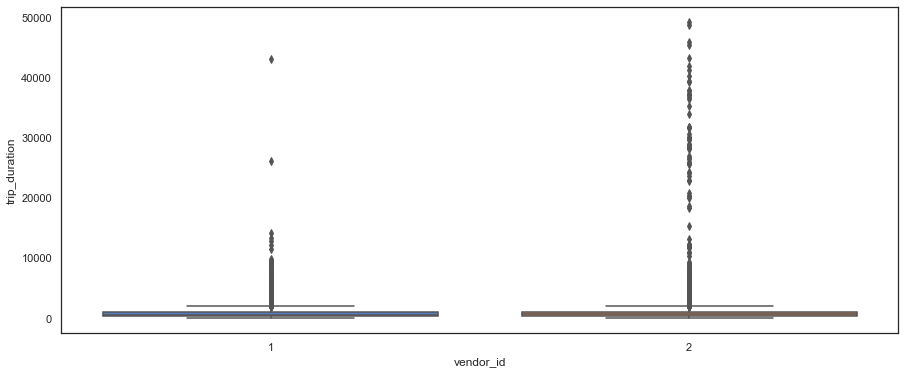

In [29]:
plt.figure(figsize=(15, 6))
trip_no_outliers = data[data['trip_duration'] < 50000]
sns.boxplot(x = 'vendor_id', y = 'trip_duration', data = trip_no_outliers)
plt.show()

Observation -
* Here we can see that vendor 2 has much outliers than vendor 1, and we know that the median for trip duration lies around 600.

## Trip duration and Passenger Count
##### Are passengers with higher count, taking longer duration to complete the trip?
We will check the trend in duration of trips as compared to the number of passengers for the trip.

In [30]:
data.passenger_count.value_counts()

1    515243
2    104576
5     38776
3     29561
6     24035
4     13972
0        31
9         1
Name: passenger_count, dtype: int64

As we know the median of trip_duration lies around 600 and we have huge outliers present in the trip_duration data, we will consider the trip_duration data of only less than 10,000 seconds.

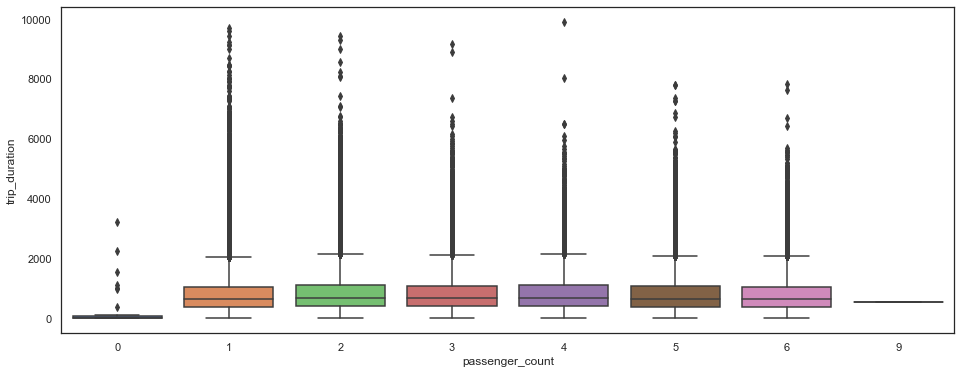

In [31]:
plt.figure(figsize=(16, 6))
trip_duration_new = data[data['trip_duration'] < 10000]
sns.boxplot(x="passenger_count", y="trip_duration", data = trip_duration_new)
plt.show()

Observation -
1. There are few trips recorded without any passenger.
2. Trips with 1 and 2 numbers of passengers have high amount of outliers present.
3. As the number of passengers are increasing, the outliers are decreasing.

## Correlation Heatmap

We will check the correlations amongst all of the variables using heatmap.

In [32]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,day_of_week,hour_of_day
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,5.993961,0,16
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,7.003974,4,23
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,7.400010,6,17
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,7.040536,1,9
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,6.744059,2,6


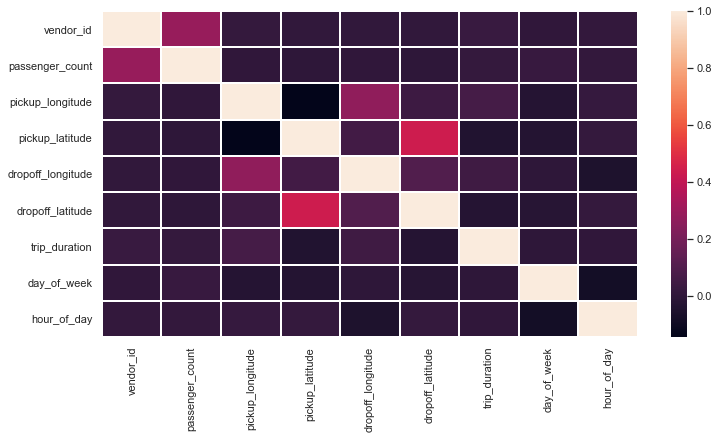

In [33]:
# From the above dataset, we will drop those columns which are irrelevant with our target variable trip_duration.

data_drop = data.drop(['id', 'pickup_datetime','dropoff_datetime', 'log_trip_duration'], axis=1)

plt.figure(figsize=(12, 6))
corr = data_drop.corr('pearson')
sns.heatmap(corr, linewidth=2)
plt.show()

Observation -
* From the above correlation heatmap, we see that the latitude and longitude have higher correlation with the target as compared to the others.

## Conclusion

1. The trip duration of rides are forming almost normal curve.
2. As noticed earlier, there is an outlier present near 12.
3. Also there are very short rides present which are of less than 10 seconds, which are suspicious.
4. Most frequent rides include only 1 passenger, while some of the rides include 7 to 9 passengers too and they are very low in number.
5. Most of the rides have been completed by vendor 2 as compared to vendor 1.
6. There is almost no storing of data taking place in the taxi and being updated later. (Y - Yes, N - No)
7. Observing the above trend, we can see that the most of the rides are on Thursday, while on the weekends, there is lowest number of rides (0 is Sunday).
8. Total number of rides in 24 hours are mostly around 18-19 hours, i.e. evening. While in the morning peak hour, it is lower than expected.
9. Pickup and drop latitudes are denser around 40 to 41, and longitude are denser around -74 to -73.
10. Extreme values are present in the data which depicts higher value of distance.
11. Most of the rides are located between these locations, apart from few outliers outside the above range.
12. Longest trip duration has been observed on Wednesday.
13. Opposite to expectation, trip duration on weekends are lowest.
14. Trip duration during early morning are comparatively lesser which may be because of low traffic, and highest during evening peak hour.
15. There is a correlation between the number of pickups and trip duration as it follows the similar trend.

16. Here we can see that vendor 2 has much outliers than vendor 1, and we know that the median for trip duration lies around 600.
17. There are few trips recorded without any passenger.
18. Trips with 1 and 2 numbers of passengers have high amount of outliers present.
19. As the number of passengers are increasing, the outliers are decreasing.
20. From the above correlation heatmap, we see that the latitude and longitude have higher correlation with the target as compared to the others.